# Pandas Data Analyst Agent

### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)


## Multi-Agents for Pandas Data Analysis

**The Pandas Data Analysis agent** we build in this tutorial is a multi-agent that can perform Pandas data wrangling and analysis on a data set and optionally visualize the results. The agent combines 2 subagents:

1. **Data Wrangling Agent:** Handles data wrangling, transformations, and analysis using Pandas.
2. **Data Visualization Agent:** Visualize the results if a user requests a plot.

This tutorial will show you how to perform Data Analysis using Pandas and data visualizations, **all in one agent.** 

### Data Set

The `churn_data.csv` data set contains customer data for a telecommunications company. 

# Table of Contents

1. [Pandas Data Analyst Agent](#pandas-data-analyst-agent)
2. [Multi-Agents for Pandas Data Analysis](#multi-agents-for-pandas-data-analysis)
3. [Build Pandas Data Analysis Agents](#build-pandas-data-analysis-agents)
    1. [Load Libraries](#load-libraries)
    2. [Setup AI and Logging](#setup-ai-and-logging)
    3. [Read a Data Set](#read-a-data-set)
    4. [Create The Agent](#create-the-agent)
    5. [Viewing Subagents With xray](#viewing-subagents-with-xray)
    6. [Run the Agent](#run-the-agent)
        1. [Example 1: What are the first 5 rows of the data?](#example-1-what-are-the-first-5-rows-of-the-data)
        2. [Example 2: Plot a boxplot with violin between monthly payment and churn](#example-2-plot-a-boxplot-with-violin-between-monthly-payment-and-churn)
    7. [Response](#response)
    8. [Pandas Data Frame](#pandas-data-frame)
    9. [Pandas Code](#pandas-code)
    10. [Workflow Summary](#workflow-summary)
4. [Want To Become A Full-Stack Generative AI Data Scientist?](#want-to-become-a-full-stack-generative-ai-data-scientist)

### Load Libraries

In [1]:
# * Libraries

from langchain_openai import ChatOpenAI
import pandas as pd
import os
import yaml

from ai_data_science_team import PandasDataAnalyst, DataWranglingAgent, DataVisualizationAgent

### Setup AI and Logging

This section of code sets up the LLM inputs and the logging information. Logging is used to store AI-generated code and files during the AI Data Science Teams processing of files. 

*Important Note:* This example uses OpenAI's API. But any LLM can be used such as Anthropic or local LLMs with Ollama.

In [2]:
# * Setup

MODEL    = "gpt-4.1-mini"
LOG      = False
LOG_PATH = os.path.join(os.getcwd(), "logs/")

os.environ["OPENAI_API_KEY"] = yaml.safe_load(open('../credentials.yml'))['openai']

llm = ChatOpenAI(model = MODEL)

llm


ChatOpenAI(profile={'max_input_tokens': 1047576, 'max_output_tokens': 32768, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'pdf_inputs': True, 'pdf_tool_message': True, 'image_tool_message': True, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x144a707f0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x147a46170>, root_client=<openai.OpenAI object at 0x144a703a0>, root_async_client=<openai.AsyncOpenAI object at 0x147a460b0>, model_name='gpt-4.1-mini', model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True)

### Read a Data Set

Next, let's read a dataset. The `churn_data.csv` data set contains customer data for a telecommunications company.

In [3]:
# * Data

df = pd.read_csv("data/churn_data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Create The Agent

Run this code to create the agent with `PandasDataAnalyst()`. This will create a multi-agent that can perform Pandas Data Analysis on a dataset and optionally visualize the results. This agent combines 2 subagents:

#### DataWranglingAgent

The `DataWranglingAgent` is a subagent that handles data wrangling, transformations, and analysis using Pandas.

#### DataVisualizationAgent

The `DataVisualizationAgent` is a subagent that visualizes the results if a user requests a plot.

Run this code to create the multi-agent:

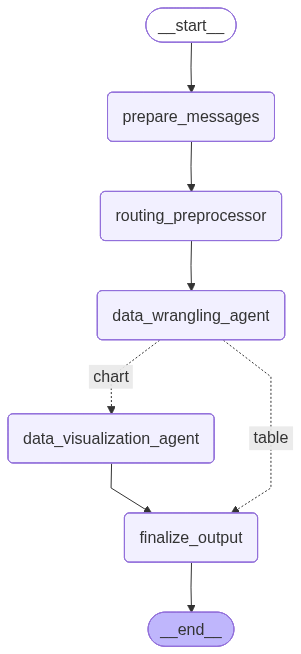

In [4]:
pandas_data_analyst = PandasDataAnalyst(
    model = llm,
    data_wrangling_agent = DataWranglingAgent(
        model = llm,
        log = LOG,
        log_path = LOG_PATH,
        bypass_recommended_steps=True,
    ),
    data_visualization_agent = DataVisualizationAgent(
        model = llm,
        n_samples = 10,
        log = LOG,
        log_path = LOG_PATH,
    ),
)

pandas_data_analyst

### Viewing Subagents With xray

Keep in mind that this agent is actually a multi-agent that combines 2 subagents. We can view the subagents by running the following code:

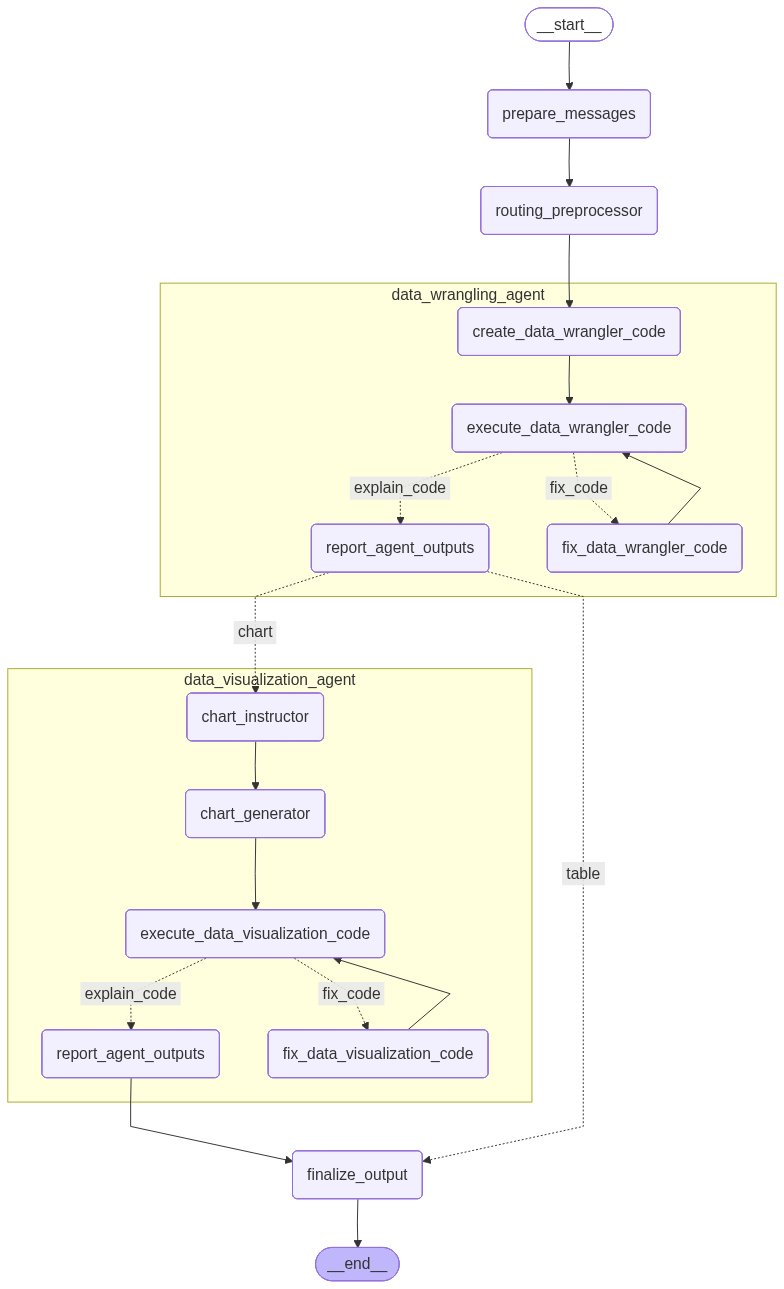

In [5]:
pandas_data_analyst.show(xray=1)

### Run the Agent

The main inputs to the SQL DB Agent are:

- **user_instructions**: What actions you'd like to take on the data. 
- **data_raw**: The data set to perform the actions on.

Let's start with a simple question that a user might want to know about the database:

## Example 1: What are the first 5 rows of the data?

In [6]:

pandas_data_analyst.invoke_agent(
    user_instructions = "What are the first 5 rows of the data?",
    data_raw=df,
)

---PANDAS DATA ANALYST---
*************************
---PREPARE MESSAGES---
---PREPROCESS ROUTER---
---DATA WRANGLING AGENT----
    * CREATE DATA WRANGLER CODE
    * EXECUTE DATA WRANGLER CODE (SANDBOXED)
    * REPORT AGENT OUTPUTS
---ROUTER: CHART OR TABLE---
---FINALIZE OUTPUT---


### Response

The response produced contains everything we need to understand the data cleaning decisions made and get the cleaned dataset. 

In [7]:
pandas_data_analyst.get_state_keys()

['messages',
 'user_instructions',
 'user_instructions_data_wrangling',
 'user_instructions_data_visualization',
 'routing_preprocessor_decision',
 'data_raw',
 'data_wrangled',
 'data_wrangler_function',
 'data_visualization_function',
 'plotly_graph',
 'plotly_error',
 'max_retries',
 'retry_count']

Not all fields will be filled if the agent did not need to use them.

- **data_wrangler_function**: The Python function that was generated by the Data Wrangling Agent.
- **data_wrangled**: The Pandas data frame that was generated by the agent.
- **data_visualization_function**: The Python function that was generated by the Data Visualization Agent.
- **plotly_graph**: The Plotly graph that was generated by the Data Visualization Agent.

#### Pandas Data Frame

In [8]:
pandas_data_analyst.get_data_wrangled()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


#### Pandas Code

In [9]:
pandas_data_analyst.get_data_wrangler_function(markdown=True)

```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: data_wrangling_agent
# Time Created: 2025-12-09 16:37:37

def data_wrangler(data_list):
    import pandas as pd
    import numpy as np
    '''
    Wrangle the data provided in data_list.
    
    data_list: A list of one or more pandas data frames containing the raw data to be wrangled.
    '''


    # Ensure the input is a list of DataFrames
    if not isinstance(data_list, list):
        data_list = [data_list]
        
    # Since we have only one dataset (main), assign it directly
    df = data_list[0].copy()

    # Step 1: Standardize column names (lowercase, strip spaces)
    df.columns = df.columns.str.strip().str.lower()
    
    # Step 2: Normalize data types
    # `totalcharges` is object but should be numeric - coerce errors to NaN
    df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
    
    # Step 3: Handle missing values
    # Check missing in totalcharges (from coercion)
    # We can fill missing totalcharges with 0 or tenure * monthlycharges (if tenure=0 it makes sense)
    # But here we will fill missing totalcharges with monthlycharges * tenure as a reasonable imputation
    missing_totalcharges_idx = df['totalcharges'].isna()
    df.loc[missing_totalcharges_idx, 'totalcharges'] = df.loc[missing_totalcharges_idx, 'monthlycharges'] * df.loc[missing_totalcharges_idx, 'tenure']
    # If any still remain (unlikely), fill with 0
    df['totalcharges'] = df['totalcharges'].fillna(0)
    
    # Step 5: Handle categorical encoding where necessary
    # Not explicitly requested, so we keep categorical columns as is.
    # Also no instruction to drop or encode columns.
    
    # Step 6: Remove duplicates and obvious anomalies
    df = df.drop_duplicates()
    
    # No other anomalies mentioned
    
    # Return the wrangled dataframe
    return df
```

## Example 2: Plot a boxplot with violin between monthly payment and churn.

In [6]:
pandas_data_analyst.invoke_agent(
    user_instructions = "Plot a boxplot with violin between monthly payment and churn.",
    data_raw=df,
)

---PANDAS DATA ANALYST---
*************************
---PREPARE MESSAGES---
---PREPROCESS ROUTER---
---DATA WRANGLING AGENT----
    * CREATE DATA WRANGLER CODE
    * EXECUTE DATA WRANGLER CODE (SANDBOXED)
    * REPORT AGENT OUTPUTS
---ROUTER: CHART OR TABLE---
---DATA VISUALIZATION AGENT----
    * CREATE CHART GENERATOR INSTRUCTIONS
    * CREATE DATA VISUALIZATION CODE
    * EXECUTE DATA VISUALIZATION CODE (SANDBOXED)
    * FIX AGENT CODE
      retry_count:0
    * EXECUTE DATA VISUALIZATION CODE (SANDBOXED)
    * REPORT AGENT OUTPUTS
---FINALIZE OUTPUT---


In [7]:
pandas_data_analyst.get_plotly_graph()

![Monthly Charge](../img/multi_agents/boxplot_monthly_charge_churn_1.jpg)

#### Workflow Summary

This is useful to see the steps taken and the code generated by the agent.

In [8]:
pandas_data_analyst.get_workflow_summary(markdown=True)




# Pandas Data Analyst Workflow Summary

This workflow contains 2 agents:

- **Agent 1:** data_wrangling_agent

- **Agent 2:** data_visualization_agent
# Data Wrangling Agent Outputs

## ---RECOMMENDED STEPS----
# Recommended Data Wrangling Steps:
1. Inspect and standardize column names (lowercase, strip spaces) if needed.
2. Normalize data types (numeric/categorical/datetime); coerce where reasonable.
3. Handle missing values (simple imputation or flagging) without dropping data unless instructed.
4. For multiple datasets, identify join keys and merge appropriately; avoid Cartesian products.
5. Handle categorical encoding where necessary (one-hot or category cleanup).
6. Remove duplicates and obvious anomalies, but avoid dropping rows unless requested.
7. Return a single pandas DataFrame with the wrangled data.

## ---DATA WRANGLER FUNCTION----
```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: data_wrangling_agent
# Time Created: 2025-12-09 16:54:32

def data_wrangler(data_list):
    import pandas as pd
    import numpy as np
    '''
    Wrangle the data provided in data_list.
    
    data_list: A list of one or more pandas data frames containing the raw data to be wrangled.
    
    Returns a single wrangled pandas DataFrame ready for plotting a boxplot with violin
    between monthly payment and churn.
    '''


    # Ensure input is a list
    if not isinstance(data_list, list):
        data_list = [data_list]

    # Since only one dataset "main" is provided, work with the first dataframe
    df = data_list[0].copy()

    # Step 1: Standardize column names - lowercase and strip spaces
    df.columns = df.columns.str.lower().str.strip()

    # Step 2: Normalize data types
    # "monthlycharges" should be numeric (float)
    # "totalcharges" is object, convert to numeric coercing errors (if any)
    df['monthlycharges'] = pd.to_numeric(df['monthlycharges'], errors='coerce')
    df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

    # "churn" is categorical/y/n as object, convert to category and standardize to 'Yes'/'No'
    df['churn'] = df['churn'].astype(str).str.strip().str.capitalize()
    df['churn'] = df['churn'].replace({'Yes': 'Yes', 'No': 'No'}).astype('category')

    # Step 3: Handle missing values
    # For monthlycharges, few missing values unlikely, if any, impute with median
    if df['monthlycharges'].isna().any():
        median_monthly = df['monthlycharges'].median()
        df['monthlycharges'].fillna(median_monthly, inplace=True)
    
    # For churn, missing values need to be flagged or dropped - here we keep as is, but drop na rows 
    # because churn is required for plot relationship - however instruction says avoid dropping unless instructed
    # We will keep rows but drop or flag rows with missing churn for this context is not mentioned, so keep as is
    
    # Since we want monthly payment vs churn boxplot/violin,
    # ensure both columns have valid data by removing rows with missing churn or monthlycharges
    # Here we avoid dropping but for plotting, those should typically be excluded - 
    # However user says do not drop unless requested, so we keep them and rely on caller to handle.

    # Step 4: No merging/join needed because only one dataset provided

    # Step 5: Handle categorical encoding where necessary
    # For boxplot with violin between monthly payment and churn,
    # churn should remain categorical, monthlycharges numeric - so no one hot encoding required

    # Step 6: Remove duplicates and obvious anomalies
    # Remove exact duplicate rows (if any)
    df.drop_duplicates(inplace=True)

    # Obvious anomaly: monthlycharges <= 0 or negative? Typically monthly payment cannot be negative or zero
    # But some services may cost zero - we'll remove negative or zero values for monthlycharges as anomalies
    df = df[df['monthlycharges'] > 0]

    # Also keep churn where values are strictly 'Yes' or 'No' categories only, exclude any others or nan
    df = df[df['churn'].isin(['Yes', 'No'])]

    # Step 7: Return a single dataframe wrangled for plotting relationship between monthly payment and churn
    # Select only columns needed for the analysis to keep the data tidy: 
    # monthlycharges and churn, but we can keep all columns for additional context
    # As user did not request dropping columns, we return full cleaned dataframe.

    return df
```

## ---DATA WRANGLER FUNCTION PATH----
```python
None
```

## ---DATA WRANGLER FUNCTION NAME----
```python
data_wrangler
```

## ---DATA WRANGLER ERROR----
None

## ---DATA WRANGLER ERROR LOG PATH----
None

## ---DATA WRANGLING SUMMARY----
# Data Wrangling Summary
Rows: 7043 -> 7043 (Δ 0)
Columns: 21 -> 21 (Δ 0)
Dropped Columns: Churn, Contract, Dependents, DeviceProtection, InternetService, MonthlyCharges, MultipleLines, OnlineBackup, OnlineSecurity, PaperlessBilling, Partner, PaymentMethod, PhoneService, SeniorCitizen, StreamingMovies, StreamingTV, TechSupport, TotalCharges, customerID
Added Columns: churn, contract, customerid, dependents, deviceprotection, internetservice, monthlycharges, multiplelines, onlinebackup, onlinesecurity, paperlessbilling, partner, paymentmethod, phoneservice, seniorcitizen, streamingmovies, streamingtv, techsupport, totalcharges
Dtype Changes:
None

# Data Visualization Agent Outputs

## ---RECOMMENDED STEPS----
# Recommended Data Visualization Steps:
CHART GENERATOR INSTRUCTIONS:  
Create a combined boxplot with an overlaid violin plot to compare the distribution of the numeric variable "monthlycharges" across the categorical variable "churn". Use "churn" as the x-axis categorical variable and "monthlycharges" as the y-axis continuous variable. The boxplot should show median, quartiles, and outliers, while the violin plot should show the kernel density estimation of the distribution for each churn group. Title the chart: "Distribution of Monthly Charges by Churn Status". Label the x-axis as "Churn Status" and the y-axis as "Monthly Charges".

## ---DATA VISUALIZATION FUNCTION----
```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: data_visualization_agent
# Time Created: 2025-12-09 16:54:50

def data_visualization(data_raw):
    import pandas as pd
    import numpy as np
    import json
    import plotly.graph_objects as go
    import plotly.io as pio





    # Ensure 'monthlycharges' and 'churn' exist and drop any rows with missing values in these cols
    df = data_raw[['monthlycharges', 'churn']].dropna()

    fig = go.Figure()

    # Add violin plots for each churn category
    for churn_status in df['churn'].unique():
        subset = df[df['churn'] == churn_status]
        fig.add_trace(go.Violin(
            x=np.repeat(churn_status, subset.shape[0]),
            y=subset['monthlycharges'],
            name=str(churn_status),
            box_visible=False,  # We'll add boxplot separately
            meanline_visible=False,
            showlegend=False,
            line=dict(width=1),
            points=False,  # fixed invalid value 'none' to False
            spanmode='hard',
            opacity=0.6,
            bandwidth=3
        ))

    # Add boxplots for each churn category on top to show median, quartiles, outliers
    for churn_status in df['churn'].unique():
        subset = df[df['churn'] == churn_status]
        fig.add_trace(go.Box(
            x=np.repeat(churn_status, subset.shape[0]),
            y=subset['monthlycharges'],
            name=str(churn_status),
            boxpoints='outliers',
            marker=dict(color='black'),
            line=dict(color='black'),
            fillcolor='rgba(0,0,0,0)',
            whiskerwidth=0.5,
            showlegend=False
        ))

    fig.update_layout(
        title="Distribution of Monthly Charges by Churn Status",
        xaxis_title="Churn Status",
        yaxis_title="Monthly Charges",
        violingap=0,
        violingroupgap=0,
        violinmode='overlay',
        boxmode='overlay'
    )

    fig_json = pio.to_json(fig)
    fig_dict = json.loads(fig_json)

    return fig_dict
```

## ---DATA VISUALIZATION FUNCTION PATH----
```python
None
```

## ---DATA VISUALIZATION FUNCTION NAME----
```python
data_visualization
```

## ---DATA VISUALIZATION ERROR----
None

## ---DATA VISUALIZATION ERROR LOG PATH----
None

## ---DATA VISUALIZATION SUMMARY----
Plotly figure with 4 trace(s) generated.

# Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)